# Deep Learning Lab Exam

In this lab exam, you will be implementing a neural network with 1 hidden layer (with the activation function tanh) and use it to classify whether a banknote is authentic (**1**) or not (**0**): Your network would look like the following:

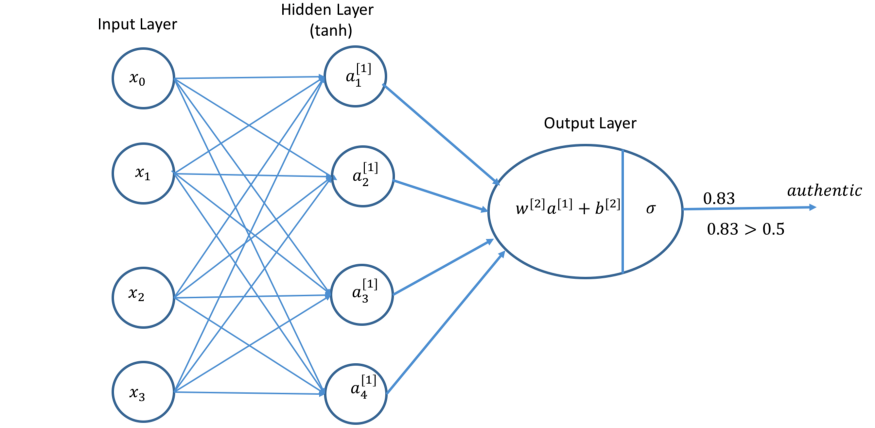

# Exam set up (Do not edit!)

In [1]:
# Download the dataset using wget. If you are not on colab or linux, you can skip this line and download your dataset directly
# and place it in the same folder as your notebook
!wget http://archive.ics.uci.edu/ml/machine-learning-databases/00267/data_banknote_authentication.txt

'wget' is not recognized as an internal or external command,
operable program or batch file.


In [ ]:
# Import relevant libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import pandas as pd

Dataset Attribute Information:

1. variance of Wavelet Transformed image (continuous)
2. skewness of Wavelet Transformed image (continuous)
3. curtosis of Wavelet Transformed image (continuous)
4. entropy of image (continuous)
5. class (integer)

In [ ]:
# Importing the dataset and extracting the inputs and the outputs
data = np.genfromtxt("data_banknote_authentication.txt", delimiter = ",")
X = data[:,:4]
y = data[:, 4]

In [ ]:
# Split the dataset into a training and test dataset

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train = X_train.T
y_train = y_train.reshape(1, y_train.shape[0])
X_test = X_test.T
y_test = y_test.reshape(1, y_test.shape[0])
print ("Train X Shape: ", X_train.shape)
print ("Train Y Shape: ", y_train.shape)
print ("%d training examples." % (X_train.shape[1]))

print ('\nTest X Shape: ', X_test.shape)

Train X Shape:  (4, 1097)
Train Y Shape:  (1, 1097)
1097 training examples.

Test X Shape:  (4, 275)


Note that in X, every column contains each record

# The exam starts

In this exam, we will:
1. Define the neural network structure ( # of input neurons,  # of hidden neurons, etc). 
2. Initialize the model's parameters
3. Loop:
    - Implement forward propagation
    - Compute loss
    - Implement backward propagation to get the gradients
    - Update parameters (gradient descent)
4. Evaluate accuracy

### [1 mark] Define Structure:
In this task, you need to take the inputs (**X**) and output(**Y**) and number of hidden neurons you want to add in your hidden layer, and based on that return number of input neurons, number of hidden neurons and number of output neurons.

In [ ]:
def define_structure(X, Y,hidden_neurons):
  # IMPLEMENT
  return num_input_neurons, num_hidden_neurons, num_output_neurons

num_input_neurons, num_hidden_neurons, num_output_neurons = define_structure(X_train, y_train,4)
print("The size of the input layer is := " + str(num_input_neurons))
print("The size of the hidden layer is := " + str(num_hidden_neurons))
print("The size of the output layer is := " + str(num_output_neurons))

# Note that input layer should always have 4 neurons since we have 1 input
# Output layer should have 1 neuron since we are predicting 1 value, whether
# the note is authentic or not

# For the purpose of this exam, number of hidden neurons would be 4.

The size of the input layer is:  = 4
The size of the hidden layer is:  = 4
The size of the output layer is:  = 1


### [1 mark] : Parameter Initialization

Now that we know the structure of the network, we can initialize the parameters of our network.

Since our network has 1 hidden layer, we will have 2 set of weights and biases.
1.  From input to hidden layer (W1, b1)
2. from Hidden to output layer (W2, b2)

Based on the structure of the network, initialize these parameters.

Initialize weights (W1,W2) using `np.random.randn` and scale them by a factor of 0.01. 

Initialize biases (b1,b2) as 0s (using `np.zeros`)


In [ ]:
def parameters_initialization(num_input_neurons, num_hidden_neurons, num_output_neurons):
  # Seed is set for ease of testing. Do not remove.
  np.random.seed(2) 
  # IMPLEMENT 


  # We are going to be storing the parameters in a 
  # dictionary for ease of access later on
  parameters = {"W1": W1,
                "b1": b1,
                "W2": W2,
                "b2": b2}
  
  return parameters

### [0.5 marks]: Implement the Sigmoid function
Sigmoid is defined as follows:
$$S(z) = \frac{1}{1+e^{-z}}$$


In [ ]:
def sigmoid(z):
  # IMPLEMENT

### [1 mark]  Forward propogation

In order to get a result from the neural network, we need to propogate our inputs through the network.

Your goal is to implement a function which propogates the inputs (X) through the network and computes the result at each part of the network.

We are naming the parts of the networks as follows:

$Z_1$ as the output to the hidden layer from the input layer (without the activation function applied)

$A_1$ as applying the activation function to $Z_1$

$Z_2$ as the output to the output layer from the hidden layer ($A_1$)
with no activation function

$A_2$ as sigmoid being applied to $Z_2$ to get the final output (Probability that the input belongs to class 1 by the network)

$$Z_1 = W_1X+b_1$$
$$A_1 = \tanh(Z_1)$$
$$Z_2 = W_2A_1 + b_2$$
$$A_2 = S(Z_2)$$

**Note**: Make sure your matrices are in such a way that your weight matrices are initialized in such a way, such that these equations make sense. If you don't, then you might have to adjust how you deal with backpropogation.

In numpy, you can do tanh, by `np.tanh`

In [ ]:
def forward_propagation(X, parameters):
  # Extract weights and biases from the dictionary
  W1 = parameters['W1']
  b1 = parameters['b1']
  W2 = parameters['W2']
  b2 = parameters['b2']
  
  # Compute Z1,A1,Z2,A2
  # IMPLEMENT

  
  # Save the output of each layer in a dictionary to help with backpropogation later on
  cache = {"Z1": Z1,"A1": A1,"Z2": Z2,"A2": A2}
  # Return the final output and output at each layer
  return A2, cache

### [1.5 marks]: Binary Cross-entropy loss

In order for you to evaluate how far your model is from correct predictions, you need to have a loss function. We will be using Binary Cross-entropy loss since our prediction can be either Class 0 or Class 1. The formula to compute Binary Cross-entropy loss $J$ using actual outputs $Y$ and the **output from your last layer $A^{[2]}$** is as follows


$$J(Y,A^{[2]})=-\frac{1}{m} \sum_{i=1}^{m} Y^{(i)} \log(A^{[2](i)}) +  (1-Y^{(i)}) \log(1-A^{[2](i)})$$

where $m$ is the number of samples.

You can use `np.log` for log.

In [ ]:
def cross_entropy_cost(Y,A2):
  # IMPLEMENT                                
  return cost

### [1.5 marks] : Back Propogation

Now that we have gotten the output at each layer, we can compute the gradients at each layer and use that in order to nudge our model parameters in the right direction.

To figure out how much our actual output deviates from our desired output.
$$dZ^{[2]} = A^{[2]} - Y$$

and using that we can compute the changes for the weights and biases in the hidden layer
$$dW^{[2]} = \frac{1}{m} dZ^{[2]} A^{[1]^T}$$

$db^{[2]}$ is what you can get if you sum each row for $dZ^{[2]}$ and then divide this sum by number of samples $m$ (Do keep dimensions in numpy!)


To compute the changes in the input layer weights
$$dZ^{[1]} = W^{[2]^T} dZ^{[2]} \ast g^{[1]'}(Z^{[1]})$$
Where $g^{[1]}$ is your activation function (in our case is $\tanh$)

The derivative of $\tanh$ is
$$\tanh(Z) = 1 - \tanh^2(Z)$$
Note that $\ast$ means element-wise multiplication. In numpy, for matrix multiplication use np.dot, and for elementwise you can use `*`.


Using that, we can compute the change needed in weights and biasses.
$$dW^{[1]} = \frac{1}{m} dZ^{[1]} X^T$$

$db^{[1]}$ is what you can get if you sum each row for $dZ^{[1]}$ and then divide this sum by number of samples $m$ (Do keep dimensions in numpy!)


Note: sum each row for means that if I have an array `[[1,2],[3,5]]`, we will get `[3,8]` and keeping the dimensions same, would give us `[[3],[8]]`.

To raise each element in a numpy array A to the power i, you can  can be done by `np.power(A,i)`


In [ ]:
def backward_propagation(parameters, cache, X, Y):
    
    W1 = parameters['W1']
    W2 = parameters['W2']
    A1 = cache['A1']
    A2 = cache['A2']

    # Compute dW2,db2,dW1,db1
    # You would find it convenient it to compute dZ2,dZ1
    # IMPLEMENT   

    # Store the changes in a dictionary grads to be used for gradient descent
    grads = {"dW1": dW1, "db1": db1, "dW2": dW2,"db2": db2}
    
    return grads

### [1.5 marks]: Gradient Descent

Now that we have computed the changes that we need, we can just apply gradient descent to every weight and bias parameter with learning rate $\alpha$

$W = W - \alpha dW$
and 
$B = b - \alpha db$


In [ ]:
def gradient_descent(parameters, grads, learning_rate = 0.01):
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']

    dW1 = grads['dW1']
    db1 = grads['db1']
    dW2 = grads['dW2']
    db2 = grads['db2']

    # Perform gradient descent
    # IMPLEMENT
    
    # Return the updated parameters
    parameters = {"W1": W1, "b1": b1,"W2": W2,"b2": b2}
    
    return parameters

### [1.5 marks] Making the network: Bringing it all together.

Now we can bring everything together and make our model work.

As a reminder, the network is supposed to

1. Define the neural network structure ( # of input neurons,  # of hidden neurons, etc). 
2. Initialize the model's parameters
3. Loop:
    - Implement forward propagation
    - Compute loss (print the loss)
    - Implement backward propagation to get the gradients
    - Update parameters (gradient descent)

Once the model is trained, we can return the parameters.

In [1]:
def neural_network_model(X, Y, num_hidden_neurons, num_iterations = 1000):
    np.random.seed(3)
    # Define the structure
    # Initialize Parameters
    
    # IMPLEMENT

    # Training loop
    
    for i in range(num_iterations):
      # forward prop
      # Compute loss
      # Back prop to find gradients
      # Update gradients
      # IMPLEMENT
      # Print loss (Do not edit!)
        if i % 5 == 0:
            print ("Cost after iteration %i: %f" %(i, loss))
    return parameters

# Train the model (Do not edit!!)
parameters = neural_network_model(X_train, y_train, 4, num_iterations=1000)

NameError: ignored

### [0.5 marks] Prediction and accuracy:

We now have a well trained model. We can now evaluate how good our model is on the test dataset, your goal is to create a function `prediction` which takes in parameters and the test inputs and based on that give predictions. 

If we have probability of class 1 as $>0.5$, our prediction is 1, else 0.

Once you are done with that compute the accuracy: See the **percentage** of predictions that were right (This will be done using actual Ys and your predictions) on both the **training and test** dataset

In [ ]:
def prediction(parameters, X):
    # IMPLEMENT

# Feel free to make a function for accuracy as well

In [ ]:
predictions = prediction(parameters, X_train)
# Feel free to make an accuracy function to compute accuracy
predictions = prediction(parameters, X_test)


Accuracy Train: 97%
Accuracy Test: 96%
